In [1]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


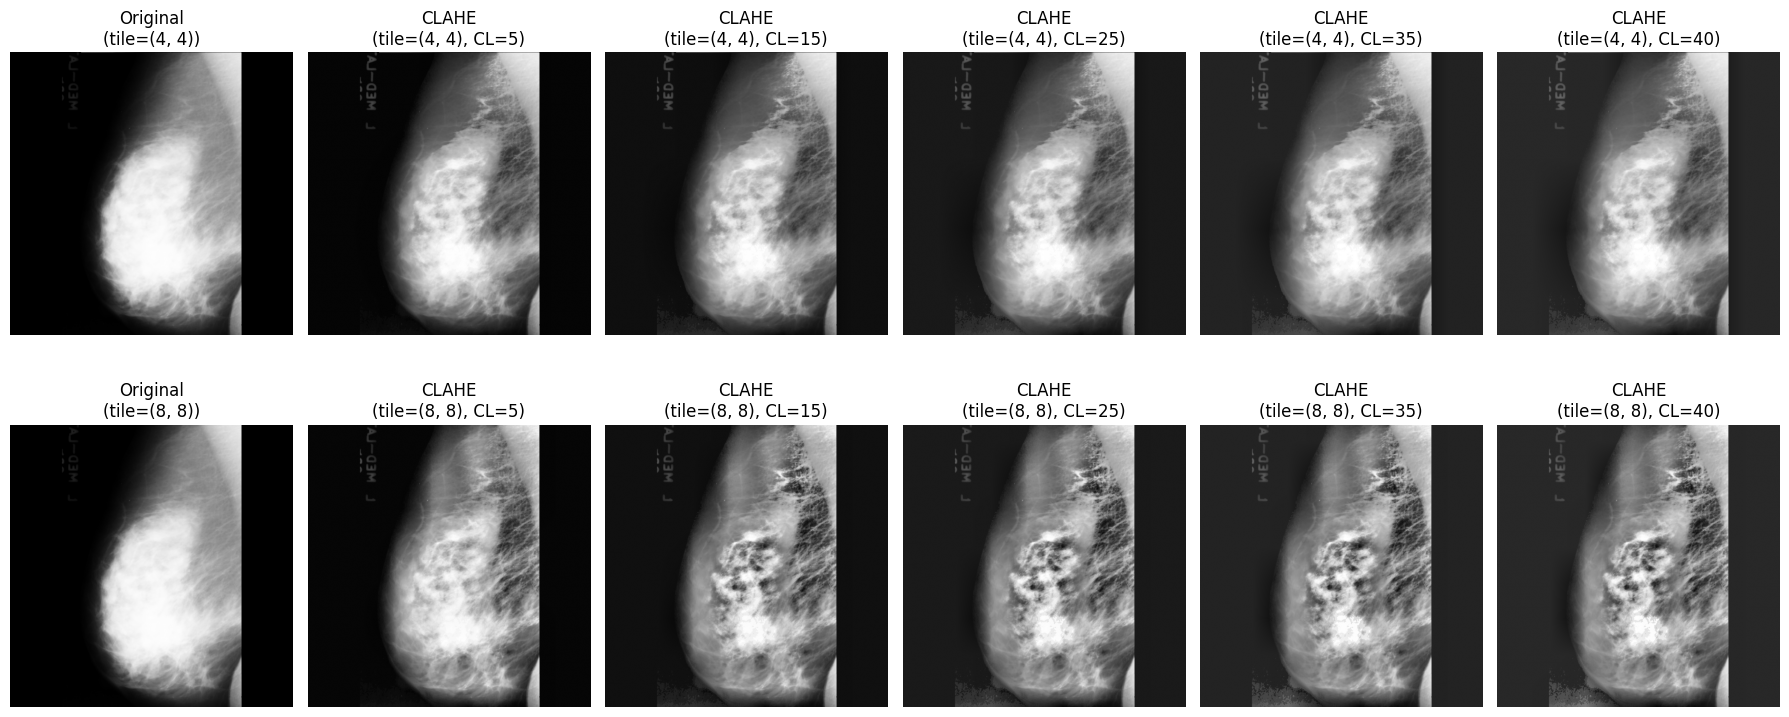

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load mammogram in grayscale
img_path = "/content/drive/MyDrive/MIAS/Images/mdb105.jpg"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Median filter (kernel size 3)
img = cv2.medianBlur(img, 3)

# Define parameter sets
clip_limits = [5, 15, 25, 35, 40]
tile_sizes = [(4,4), (8,8)]

# Prepare plot
fig, axes = plt.subplots(len(tile_sizes), len(clip_limits)+1, figsize=(18,8))

for row, tile in enumerate(tile_sizes):
    # Show original in first column
    axes[row,0].imshow(img, cmap='gray')
    axes[row,0].set_title(f"Original\n(tile={tile})")
    axes[row,0].axis("off")

    for col, cl in enumerate(clip_limits, start=1):
        # Create CLAHE with given params
        clahe = cv2.createCLAHE(clipLimit=cl, tileGridSize=tile)
        clahe_img = clahe.apply(img)

        # Show result
        axes[row,col].imshow(clahe_img, cmap='gray')
        axes[row,col].set_title(f"CLAHE\n(tile={tile}, CL={cl})")
        axes[row,col].axis("off")

plt.tight_layout()
plt.show()

In [2]:
import cv2
import os
import glob


input_folder = "/content/drive/MyDrive/MIAS/Images"        # folder where MIAS images are stored
output_folder = "/content/drive/MyDrive/MIAS/CLAHE" # folder where processed images will be saved

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# --- Parameters for CLAHE ---
tile_grid_size = (4,4)
clip_limit = 25          # the best parameters based on visualizations

# --- Process all images ---
for img_path in glob.glob(os.path.join(input_folder, "*.jpg")):
    # Read image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue  # skip if image not loaded

    # Step 1: Apply Median Filter (kernel size 3x3 or 5x5)
    median_img = cv2.medianBlur(img, 3)

    # Step 2: Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    clahe_img = clahe.apply(median_img)

    # Step 3: Save result
    filename = os.path.basename(img_path)  # keep original filename
    save_path = os.path.join(output_folder, filename)
    cv2.imwrite(save_path, clahe_img)

print("✅ All images processed and saved in:", output_folder)

✅ All images processed and saved in: /content/drive/MyDrive/MIAS/CLAHE
